In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# qcdenoise imports
from qcdenoise import DenseModel
from qcdenoise.io_utils import QCIRCDataSetNumpy
from qcdenoise.ml_utils import train, test

### 1. GHZ

#### Load Data

In [26]:
GHZ_traindata = QCIRCDataSetNumpy('GHZ_test_train.npy')
GHZ_testdata = QCIRCDataSetNumpy('GHZ_test_test.npy')
print('Total # of samples in train set: {}, test set:{}'.format(len(GHZ_traindata), len(GHZ_testdata)))
trainloader = DataLoader(GHZ_traindata, batch_size=32, shuffle=True, pin_memory=True)
testloader = DataLoader(GHZ_testdata, batch_size=32, shuffle=True, pin_memory=True)

Total # of samples in train set: 32000, test set:8000


#### initiate model

In [27]:
inputs, targets = GHZ_testdata[0]['input'], GHZ_testdata[0]['target']
inputs_dim = inputs.shape[0]
targets_dim = targets.shape[0]
ghz_net = DenseModel(inputs_dim=inputs_dim, targets_dim=targets_dim)
print(ghz_net)

DenseModel(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (softmax): Softmax(dim=1)
)


### Train

In [28]:
mse = torch.nn.MSELoss(reduction='sum')
ghz_net = train(ghz_net, trainloader, mse, lr=5e-4, num_epochs=5)

Epoch=1, Batch=  500, Loss= 2.225
Epoch=1, Batch= 1000, Loss= 1.213
Epoch=2, Batch=  500, Loss= 1.195
Epoch=2, Batch= 1000, Loss= 1.190
Epoch=3, Batch=  500, Loss= 1.171
Epoch=3, Batch= 1000, Loss= 1.187
Epoch=4, Batch=  500, Loss= 1.175
Epoch=4, Batch= 1000, Loss= 1.168
Epoch=5, Batch=  500, Loss= 1.160
Epoch=5, Batch= 1000, Loss= 1.147


### Test

In [29]:
_ = test(ghz_net, testloader, mse)

Batches=250, Average Loss= 1.127


sample=1182


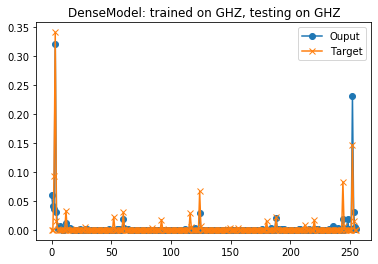

In [30]:
idx = np.random.randint(0, len(GHZ_testdata)-1)
print('sample=%d'%idx)
inputs, targets = GHZ_testdata[idx]['input'], GHZ_testdata[idx]['target']
with torch.no_grad():
    net = ghz_net.to('cpu')
    inputs = torch.unsqueeze(inputs,0)
    outputs = net(inputs)
fig,ax = plt.subplots(1,1)
ax.plot(np.squeeze(outputs.numpy()), label='Ouput', marker='o')
ax.plot(np.squeeze(targets.numpy()), label='Target', marker='x')
ax.set_title('DenseModel: trained on GHZ, testing on GHZ')
ax.legend()

### 1. UCCSD

#### Load Data

In [31]:
UCCSD_traindata = QCIRCDataSetNumpy('UCCSD_test_train.npy')
UCCSD_testdata = QCIRCDataSetNumpy('UCCSD_test_test.npy')
print('Total # of samples in train set: {}, test set:{}'.format(len(UCCSD_traindata), len(UCCSD_testdata)))
trainloader = DataLoader(UCCSD_traindata, batch_size=32, shuffle=True, pin_memory=True)
testloader = DataLoader(UCCSD_testdata, batch_size=32, shuffle=True, pin_memory=True)

Total # of samples in train set: 32000, test set:8000


#### initiate model

In [32]:
inputs, targets = UCCSD_testdata[0]['input'], UCCSD_testdata[0]['target']
inputs_dim = inputs.shape[0]
targets_dim = targets.shape[0]
uccsd_net = DenseModel(inputs_dim=inputs_dim, targets_dim=targets_dim)
print(uccsd_net)

DenseModel(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (softmax): Softmax(dim=1)
)


### Train

In [33]:
mse = torch.nn.MSELoss(reduction='sum')
uccsd_net = train(uccsd_net, trainloader, mse, lr=5e-4, num_epochs=5)

Epoch=1, Batch=  500, Loss= 0.966
Epoch=1, Batch= 1000, Loss= 0.303
Epoch=2, Batch=  500, Loss= 0.172
Epoch=2, Batch= 1000, Loss= 0.124
Epoch=3, Batch=  500, Loss= 0.100
Epoch=3, Batch= 1000, Loss= 0.086
Epoch=4, Batch=  500, Loss= 0.072
Epoch=4, Batch= 1000, Loss= 0.067
Epoch=5, Batch=  500, Loss= 0.056
Epoch=5, Batch= 1000, Loss= 0.051


### Test

In [35]:
_ = test(uccsd_net, testloader, mse)

Batches=250, Average Loss= 0.045


sample=5682


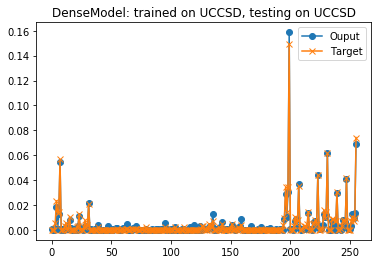

In [50]:
idx = np.random.randint(0, len(UCCSD_testdata)-1)
print('sample=%d'%idx)
inputs, targets = UCCSD_testdata[idx]['input'], UCCSD_testdata[idx]['target']
with torch.no_grad():
    net = uccsd_net.to('cpu')
    inputs = torch.unsqueeze(inputs,0)
    outputs = net(inputs)
fig,ax = plt.subplots(1,1)
ax.plot(np.squeeze(outputs.numpy()), label='Ouput', marker='o')
ax.plot(np.squeeze(targets.numpy()), label='Target', marker='x')
ax.set_title('DenseModel: trained on UCCSD, testing on UCCSD')
ax.legend()